In [269]:
#deaths change by time
#necesarry libraries
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from datetime import datetime as dt
from sklearn.preprocessing import StandardScaler
import random

# Cleaning, transforming and visualizing

## Data Wrangling:
### Creating a matrix with a binary indicator for whether they responded to a given offer
### Ensure that in doing so, NAN values are dealt with appropriately

In [291]:
#all world covid19 numbers from kaggle
#choose date column
covid=pd.read_csv('all-states-history.csv',parse_dates=['date'])
#,parse_dates=['Date']

In [292]:
covid.head()

,date,state,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,...,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2021-03-07,AK,305.0,NaN,0,NaN,1293.0,1293.0,33.0,0,...,1731628.0,0,NaN,NaN,NaN,NaN,NaN,0,1731628.0,0
1,2021-03-07,AL,10148.0,7963.0,-1,2185.0,45976.0,45976.0,494.0,0,...,2323788.0,2347,NaN,NaN,119757.0,NaN,2323788.0,2347,NaN,0
2,2021-03-07,AR,5319.0,4308.0,22,1011.0,14926.0,14926.0,335.0,11,...,2736442.0,3380,NaN,NaN,NaN,481311.0,NaN,0,2736442.0,3380
3,2021-03-07,AS,0.0,NaN,0,NaN,NaN,NaN,NaN,0,...,2140.0,0,NaN,NaN,NaN,NaN,NaN,0,2140.0,0
4,2021-03-07,AZ,16328.0,14403.0,5,1925.0,57907.0,57907.0,963.0,44,...,7908105.0,45110,580569.0,NaN,444089.0,NaN,3842945.0,14856,7908105.0,45110


In [293]:
covid.shape

(20780, 41)

In [273]:
'''
#creaate random binaries to create sex column,0=male,1=female
sex=np.random.randint(2, size=len(covid))

#creaate sex columns
covid["sex"]=sex

#make dtype of this column as category
covid["sex"] = covid["sex"].astype('category')
'''

'\n#creaate random binaries to create sex column,0=male,1=female\nsex=np.random.randint(2, size=len(covid))\n\n#creaate sex columns\ncovid["sex"]=sex\n\n#make dtype of this column as category\ncovid["sex"] = covid["sex"].astype(\'category\')\n'

In [294]:
covid.dtypes

date                                datetime64[ns]
state                                       object
death                                      float64
deathConfirmed                             float64
deathIncrease                                int64
deathProbable                              float64
hospitalized                               float64
hospitalizedCumulative                     float64
hospitalizedCurrently                      float64
hospitalizedIncrease                         int64
inIcuCumulative                            float64
inIcuCurrently                             float64
negative                                   float64
negativeIncrease                             int64
negativeTestsAntibody                      float64
negativeTestsPeopleAntibody                float64
negativeTestsViral                         float64
onVentilatorCumulative                     float64
onVentilatorCurrently                      float64
positive                       

In [295]:
#count empty cells
covid.isna().sum()

date                                    0
state                                   0
death                                 850
deathConfirmed                      11358
deathIncrease                           0
deathProbable                       13187
hospitalized                         8398
hospitalizedCumulative               8398
hospitalizedCurrently                3441
hospitalizedIncrease                    0
inIcuCumulative                     16991
inIcuCurrently                       9144
negative                             7490
negativeIncrease                        0
negativeTestsAntibody               19322
negativeTestsPeopleAntibody         19808
negativeTestsViral                  15756
onVentilatorCumulative              19490
onVentilatorCurrently               11654
positive                              188
positiveCasesViral                   6534
positiveIncrease                        0
positiveScore                           0
positiveTestsAntibody             

In [296]:
#so we can drop this field if we don't plan working on countries which have states and it has lots of missing values
#covid=covid.loc[:, ~covid.columns.str.startswith('total')]
#drop columns starts with total,positive,negative,hospitalized,currently
covid.drop(list(covid.filter(regex = 'total')), axis = 1, inplace = True)
covid.drop(list(covid.filter(regex = 'positive')), axis = 1, inplace = True)
covid.drop(list(covid.filter(regex = 'negative')), axis = 1, inplace = True)
covid.drop(list(covid.filter(regex = 'hospitalized')), axis = 1, inplace = True)
covid.drop(list(covid.filter(regex = 'Currently')), axis = 1, inplace = True)
#list some other column names we want to drop
cols=['deathIncrease','deathProbable', 'inIcuCumulative', 'onVentilatorCumulative','recovered']
#dropping columns list we defined above, different technique
covid.drop(columns=cols, inplace=True)
#another methor to filter columns but we won't use it now
#covid.loc[:,~covid.columns.str.contains('^test', case=False)]

In [297]:
covid.columns

Index(['date', 'state', 'death', 'deathConfirmed'], dtype='object')

In [298]:
covid.isna().sum()

date                  0
state                 0
death               850
deathConfirmed    11358
dtype: int64

In [299]:
#change deathConfirmed column name just for practice
covid = covid.rename(columns={'deathConfirmed': 'death_confirmed'})

In [300]:
#check dimension
covid.shape

(20780, 4)

In [301]:
covid.dtypes

date               datetime64[ns]
state                      object
death                     float64
death_confirmed           float64
dtype: object

In [302]:
#fill missing values in 'death', 'death_confirmed' column with window mean
#covid[['death', 'death_confirmed']] = covid[['death', 'death_confirmed']].fillna(covid[['death', 'death_confirmed']].rolling(12,min_periods=3).mean())
covid[['death', 'death_confirmed']].ffill(limit=1).rolling(window=3, min_periods=1).mean()


,death,death_confirmed
0,305.000000,NaN
1,5226.500000,7963.000000
2,5257.333333,6135.500000
3,5155.666667,5526.333333
4,7215.666667,7673.000000
...,...,...
20775,NaN,NaN
20776,NaN,NaN
20777,NaN,NaN
20778,NaN,NaN


In [303]:
#check NA values again
covid.isna().sum()

date                   0
state                  0
death                850
death_confirmed    11358
dtype: int64

In [304]:
#drop the rest to be able to convert dtypes of columns
covid=covid.dropna()

In [305]:
covid[['death','death_confirmed']]=covid[['death','death_confirmed']].astype('int64')

In [306]:
covid.dtypes

date               datetime64[ns]
state                      object
death                       int64
death_confirmed             int64
dtype: object

In [307]:
#total number of total deaths by state using groupby and aggregation
covid.groupby(['state']).agg({'death':'sum'})

,death
state,
AK,14454
AL,1033731
AR,551914
AZ,1883525
CO,883260
CT,1453949
DE,228375
FL,390457
GA,1521205


In [308]:
#let's check if there is a correlation between states and deaths(string and integer)
covid.state.str.get_dummies(sep=' ').corrwith(covid['death'])
#just a few states are not highly correlated with covid deaths. so we can say being in a specific state is doesn't matter

AK   -0.145502
AL   -0.030962
AR   -0.030159
AZ    0.107824
CO   -0.045026
CT    0.041444
DE   -0.153446
FL   -0.005625
GA    0.204807
HI   -0.168161
ID   -0.131071
IL    0.305056
IN    0.044651
KY   -0.098711
LA    0.055406
MA    0.243858
MD   -0.009007
ME   -0.156508
MI    0.169155
MN   -0.044918
MP   -0.133037
MS   -0.027391
NC    0.009272
NJ    0.467671
NV   -0.009288
OH    0.068509
PR   -0.134165
SC   -0.023352
TN   -0.008660
TX   -0.019928
VA   -0.027064
VI   -0.020647
VT   -0.145015
WA   -0.078576
WI   -0.058009
WV   -0.102538
dtype: float64

Text(0, 0.5, 'deaths')

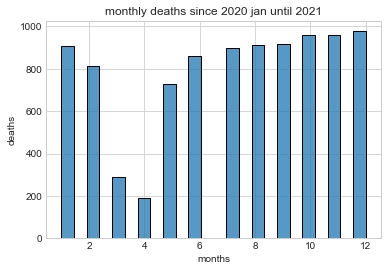

In [324]:
#monthly number of deaths
x=covid.date.dt.month
y=covid.death

#tried matplotlib histogram#plt.hist(y,color ='green',alpha = 0.7)

#plot seaborn histogram
sns.histplot(data = x)
#covid.groupby(covid.Date.dt.month)['Deaths']

# about tick names,it's just one year, it could be done like that
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct','Nov','Dec']


##!couldn't fix spacing between months sticks please help
#plt.xticks(np.linspace(0,12,12), months,rotation=45, ha='center')

plt.title("monthly deaths since 2020 jan until 2021")
plt.xlabel("months")
plt.ylabel("deaths")

#i couldn't solve aligning x labels?

In [200]:
#reading months 2 alterneatives
#pd.DatetimeIndex(covid_w_country.Date).month
#df.Date.dt.month

In [329]:
covid.reset_index(inplace = True)

In [330]:
#monthly over all death counts using different method
#a=pd.DatetimeIndex.groupby(covid.Date).month.sum()
covid['death'].groupby([[d.month for d in covid.date]]).sum()

1     6295072
2     6900201
3     1855868
4      258249
5     1278793
6     1960479
7     2405737
8     2704324
9     2861114
10    3274890
11    3891387
12    5019968
Name: death, dtype: int64

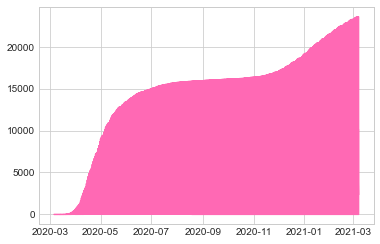

In [331]:
#let's plot increase in time since 2020
plt.plot(covid.date,covid['death'],c = 'hotpink')
plt.grid(True)
plt.xticks=covid.date.dt.month
plt.show()

#i couldn't plot monthly change graph why? it's not showing me any result

# Modelling
### Visualizing clusters with PCA

In [337]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [333]:
X=covid
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.33, random_state=42)
covid['date'] = pd.to_numeric(pd.to_datetime(covid['date']))
covid['date']=covid['date'].astype('int64')

In [338]:
regressor = PCA()
regressor.fit(X_train,y_train)
y_pred= regressor.predict(X_test)

TypeError: invalid type promotion

In [340]:
model = sm.OLS(X_train, y_train)
results = model.fit()
print(results.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

# Conclusions